#3.2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
xy = np.random.uniform(-1,1,(3,10000))
radius = sum(xy**2)
fraction = sum(radius<1)/10000
print(fraction)

[0.5158]


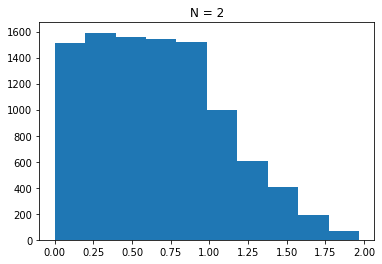

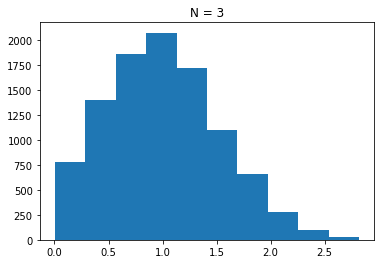

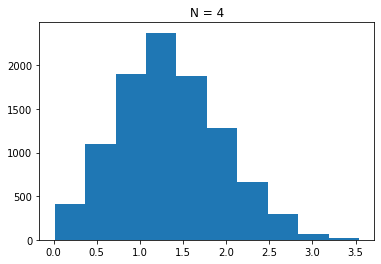

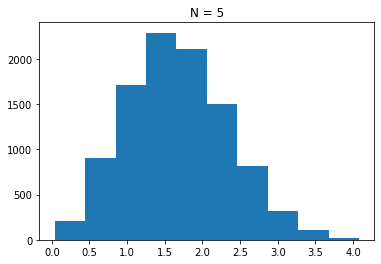

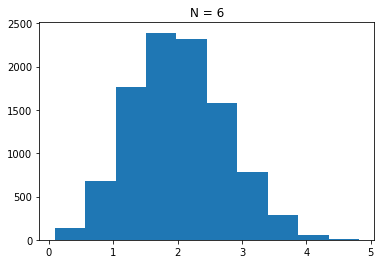

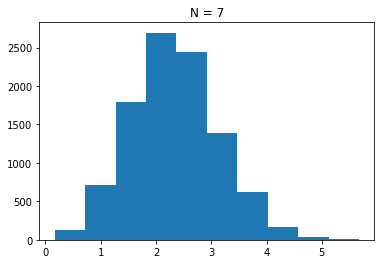

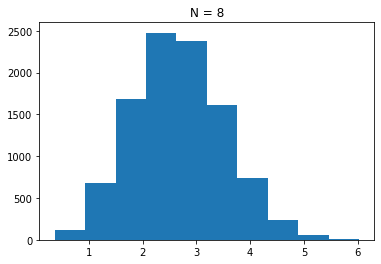

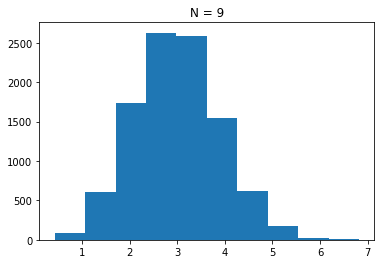

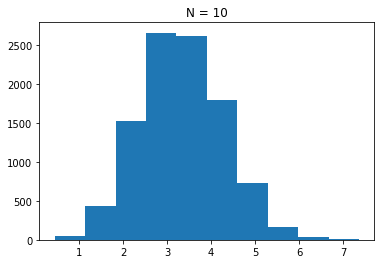

In [37]:
fraction = []
for N in range(2,11):
    xy = np.random.uniform(-1,1,(N,10000))
    radius = sum(xy**2)
    fraction.append(sum(radius<1)/10000)
    plt.figure()
    plt.hist(radius)
    plt.title("N = "+str(N))

histogram becomes symmetric

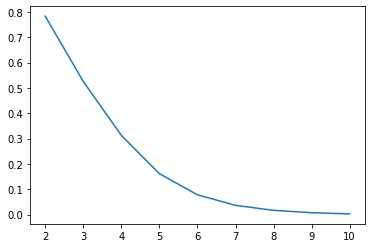

In [32]:
plt.plot(list(range(2,11)),fraction)

#3.3

In [24]:
from scipy.fftpack import dct, idct

a

In [46]:
n=1000
s = np.zeros((n))
coef = np.random.rand(5)
position = np.random.choice(list(range(n)),5)
s[position] = coef
Psi = dct(np.identity(n))

In [62]:
relative_error = []
l1_error = []
l0_error = []
for p in range(100):
    relative = []
    l1 = []
    l0 = []
    for i in range(10):
        C = np.random.randn(p+1,n)
        theta = C@Psi
        y = theta@s
        hat_s = np.linalg.pinv(theta) @ y
        relative.append(error(s,hat_s))
        l1.append(np.linalg.norm(s-hat_s,1))
        l0.append(np.linalg.norm(s-hat_s,0))
    
    relative_error.append(relative)
    l1_error.append(l1)
    l0_error.append(l0)

In [57]:
def error(s,hat_s):
    return np.linalg.norm(s-hat_s,2)/np.linalg.norm(s,1)

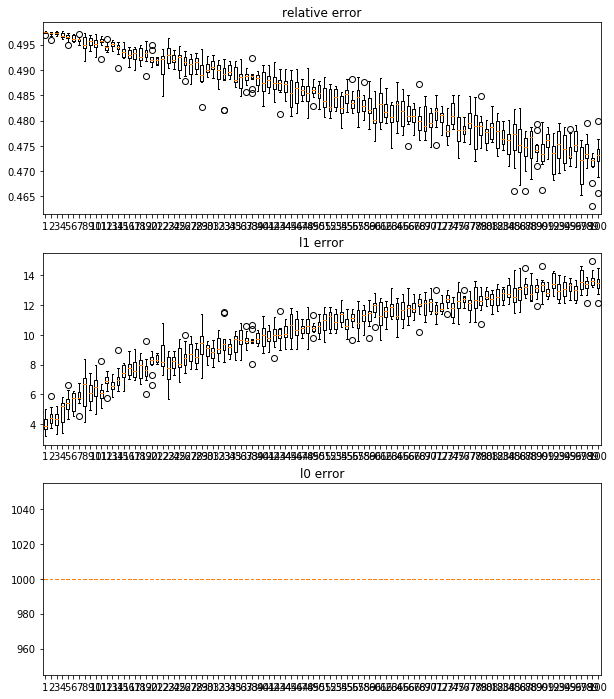

In [80]:
fig, axs = plt.subplots(3,figsize =(10, 12))
bp[0] = axs[0].boxplot(relative_error)
axs[0].set_title('relative error')

bp[1] = axs[1].boxplot(l1_error)
axs[1].set_title('l1 error')

bp[2] = axs[2].boxplot(l0_error)
axs[2].set_title('l0 error')

plt.show()

b

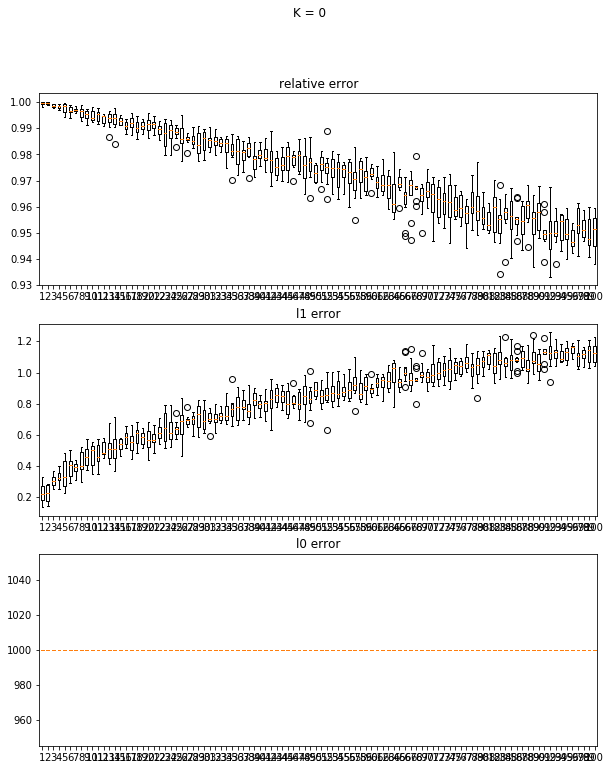

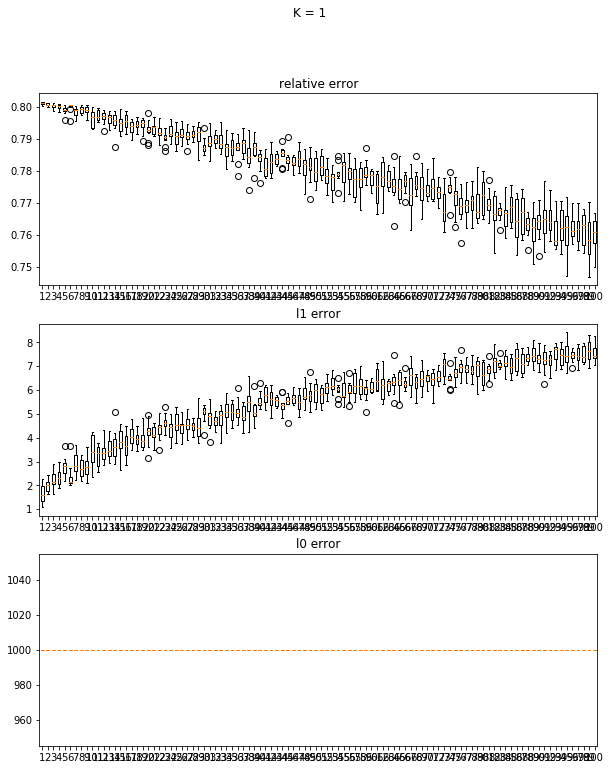

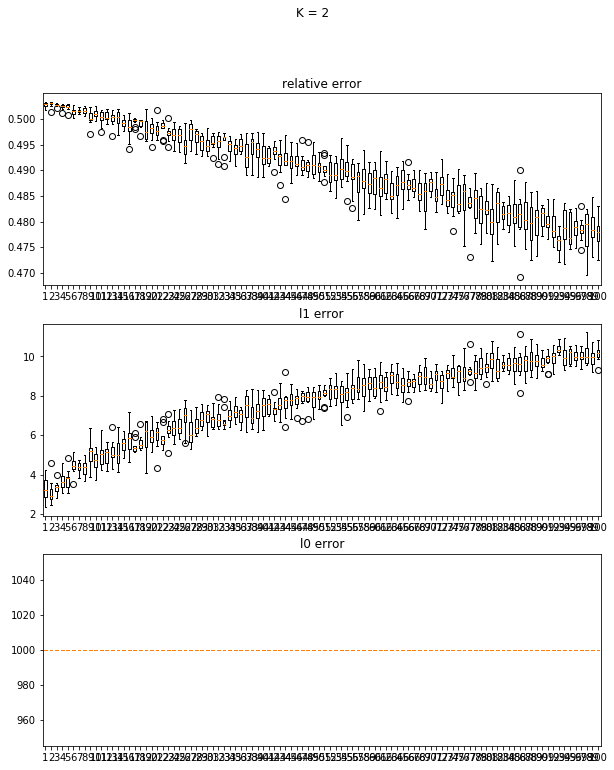

In [82]:
n=1000
s = np.zeros((n))
Psi = dct(np.identity(n))

for k in range(3):
    coef = np.random.rand(k+1)
    position = np.random.choice(list(range(n)),k+1)
    s[position] = coef
    
    relative_error = []
    l1_error = []
    l0_error = []
    for p in range(100):
        relative = []
        l1 = []
        l0 = []
        for i in range(10):
            C = np.random.randn(p+1,n)
            theta = C@Psi
            y = theta@s
            hat_s = np.linalg.pinv(theta) @ y
            relative.append(error(s,hat_s))
            l1.append(np.linalg.norm(s-hat_s,1))
            l0.append(np.linalg.norm(s-hat_s,0))

        relative_error.append(relative)
        l1_error.append(l1)
        l0_error.append(l0)

    fig, axs = plt.subplots(3,figsize =(10, 12))
    fig.suptitle("K = "+str(k+1))
    bp[0] = axs[0].boxplot(relative_error)
    axs[0].set_title('relative error')

    bp[1] = axs[1].boxplot(l1_error)
    axs[1].set_title('l1 error')

    bp[2] = axs[2].boxplot(l0_error)
    axs[2].set_title('l0 error')

    plt.show()

c

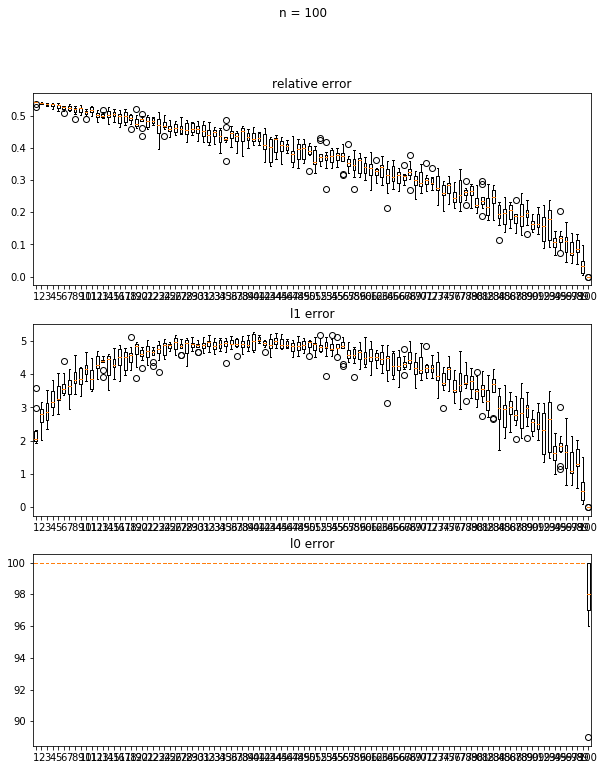

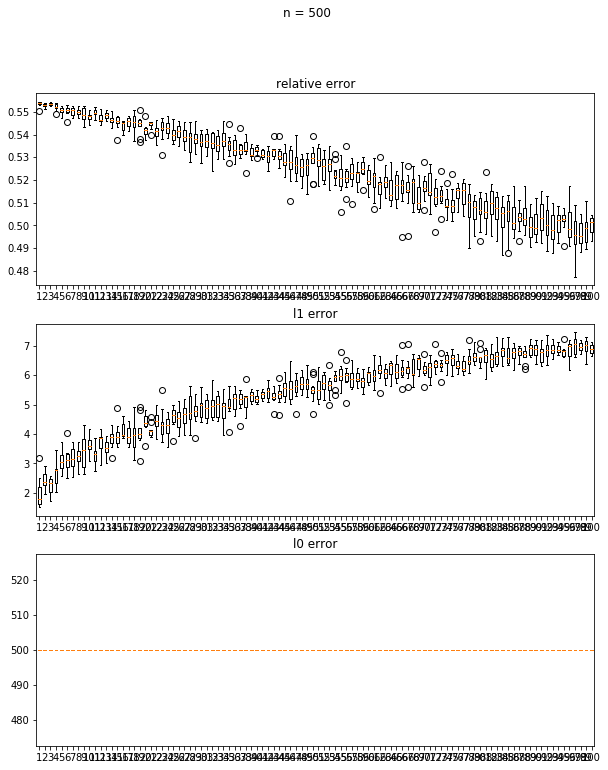

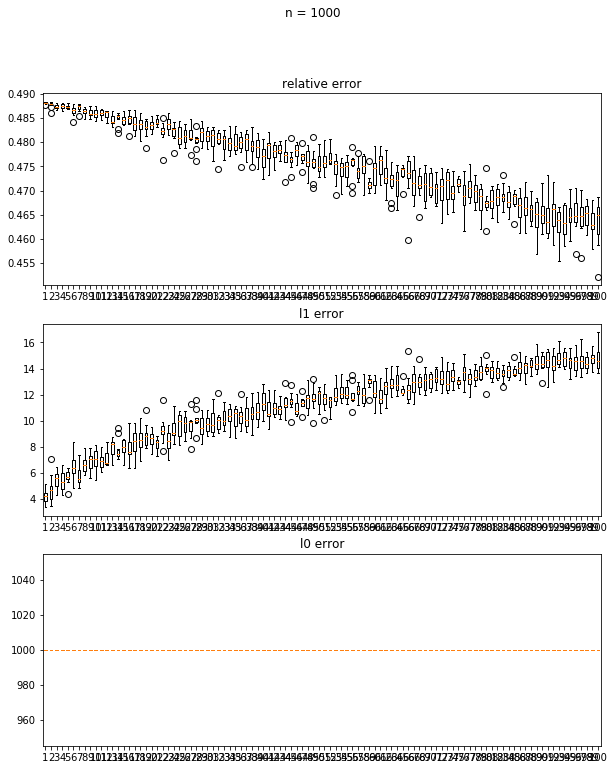

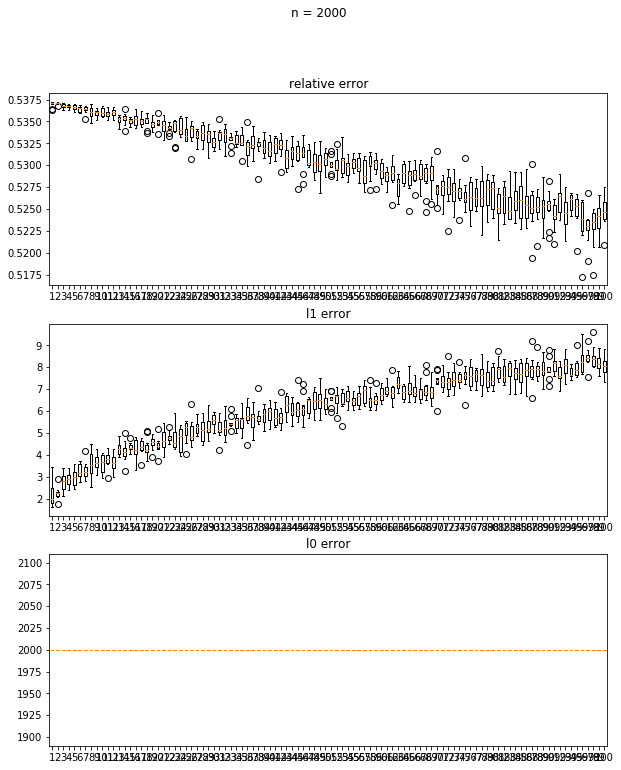

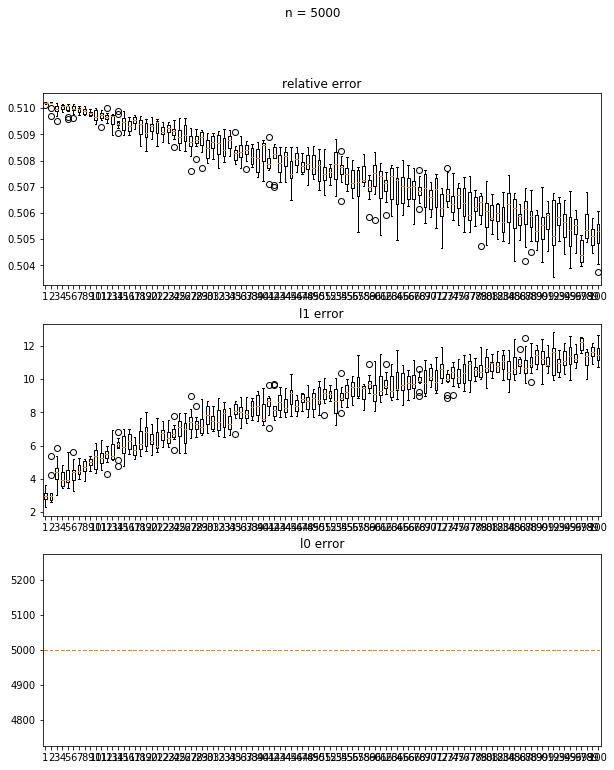

In [83]:
for n in [100,500,1000,2000,5000]:
    s = np.zeros((n))
    Psi = dct(np.identity(n))
    coef = np.random.rand(5)
    position = np.random.choice(list(range(n)),5)
    s[position] = coef
    
    relative_error = []
    l1_error = []
    l0_error = []
    for p in range(100):
        relative = []
        l1 = []
        l0 = []
        for i in range(10):
            C = np.random.randn(p+1,n)
            theta = C@Psi
            y = theta@s
            hat_s = np.linalg.pinv(theta) @ y
            relative.append(error(s,hat_s))
            l1.append(np.linalg.norm(s-hat_s,1))
            l0.append(np.linalg.norm(s-hat_s,0))

        relative_error.append(relative)
        l1_error.append(l1)
        l0_error.append(l0)

    fig, axs = plt.subplots(3,figsize =(10, 12))
    fig.suptitle("n = "+str(n))
    bp[0] = axs[0].boxplot(relative_error)
    axs[0].set_title('relative error')

    bp[1] = axs[1].boxplot(l1_error)
    axs[1].set_title('l1 error')

    bp[2] = axs[2].boxplot(l0_error)
    axs[2].set_title('l0 error')

    plt.show()

3.6

In [247]:
from scipy.io import loadmat
from skimage.transform import resize
from sklearn import preprocessing

In [86]:
fluid = loadmat('/Users/senlin/Downloads/DATA-2/FLUIDS/CYLINDER_ALL.mat')
snapshots = fluid['VORTALL']
m = int(fluid['m'])
n = int(fluid['n'])

In [248]:
scaler = preprocessing.StandardScaler().fit(snapshots)
snapshots = scaler.transform(snapshots)

In [249]:
M = snapshots.shape[1]
Theta = np.zeros((400,M))
for k in range(M):
    temp = np.reshape(np.copy(snapshots[:,k]),(n,m))
    tempSmall = resize(temp, (20, 20), anti_aliasing=True)
    Theta[:,k] = np.reshape(tempSmall,400)    

In [250]:
%matplotlib notebook
%matplotlib notebook
from matplotlib.animation import FuncAnimation

Traceback (most recent call last):
  File "/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


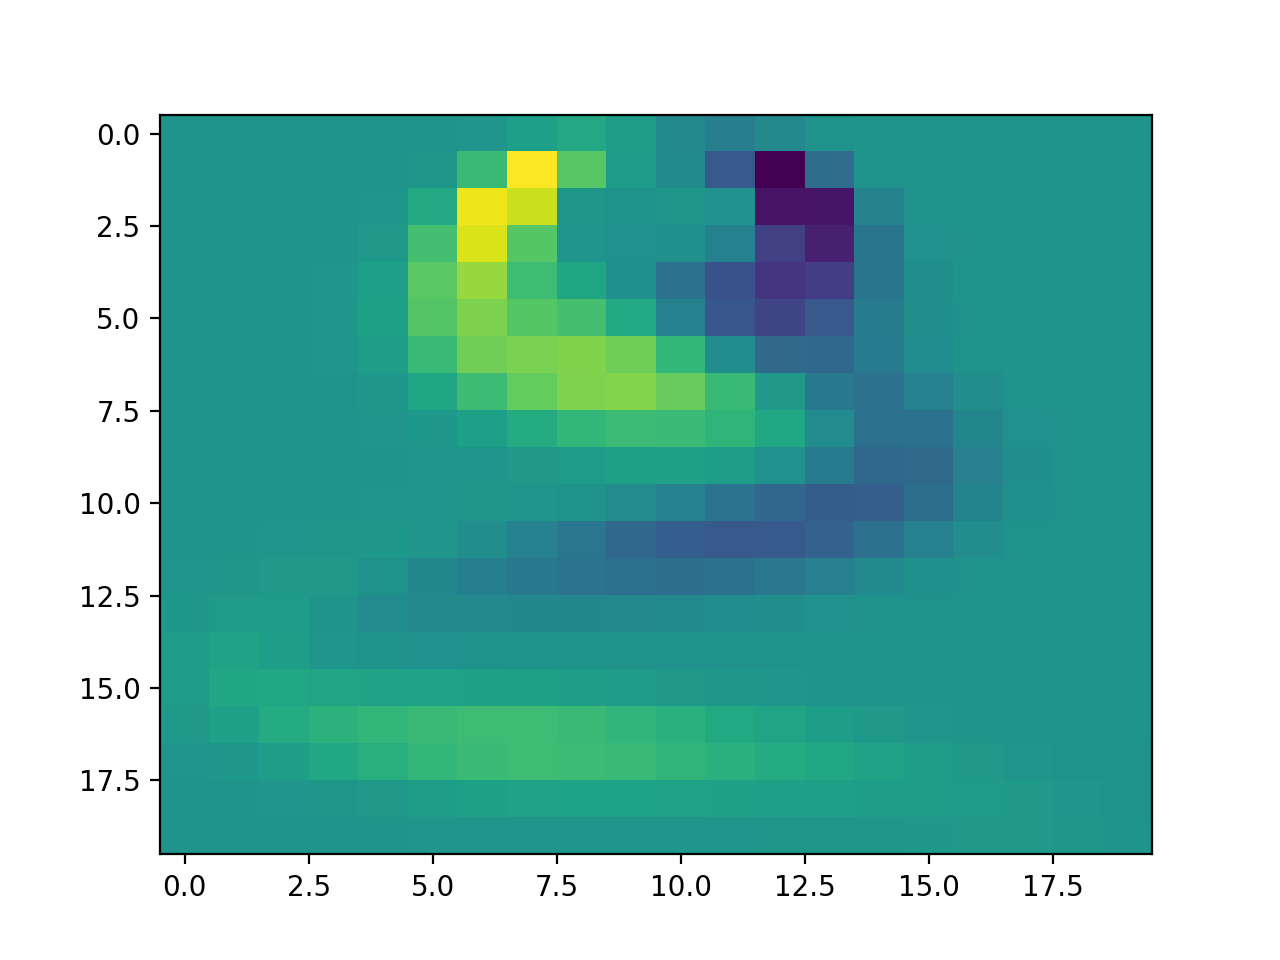

In [251]:
fig, ax = plt.subplots()
im = plt.imshow(Theta[:,0].reshape(20,20), interpolation='none', aspect='auto')
# image, = ax.imshow([])

def animate(frame_num):
    data = Theta[:,frame_num+1].reshape(20,20)
    im.set_array(data)
    return [im]

anim = FuncAnimation(fig, animate, interval=1)
# anim.save('test_anim.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()

In [252]:
normTheta = np.zeros(M)
for k in range(M):
    normTheta[k] = np.linalg.norm(Theta[:,k])
    Theta[:,k] = Theta[:,k]/normTheta[k]

In [253]:
example = np.copy(snapshots[:,0]).reshape(n,m)
noised = example + 1*np.random.randn(*example.shape)
downsampled = resize(noised,(20, 20), anti_aliasing=True).reshape(400)

<IPython.core.display.Javascript object>


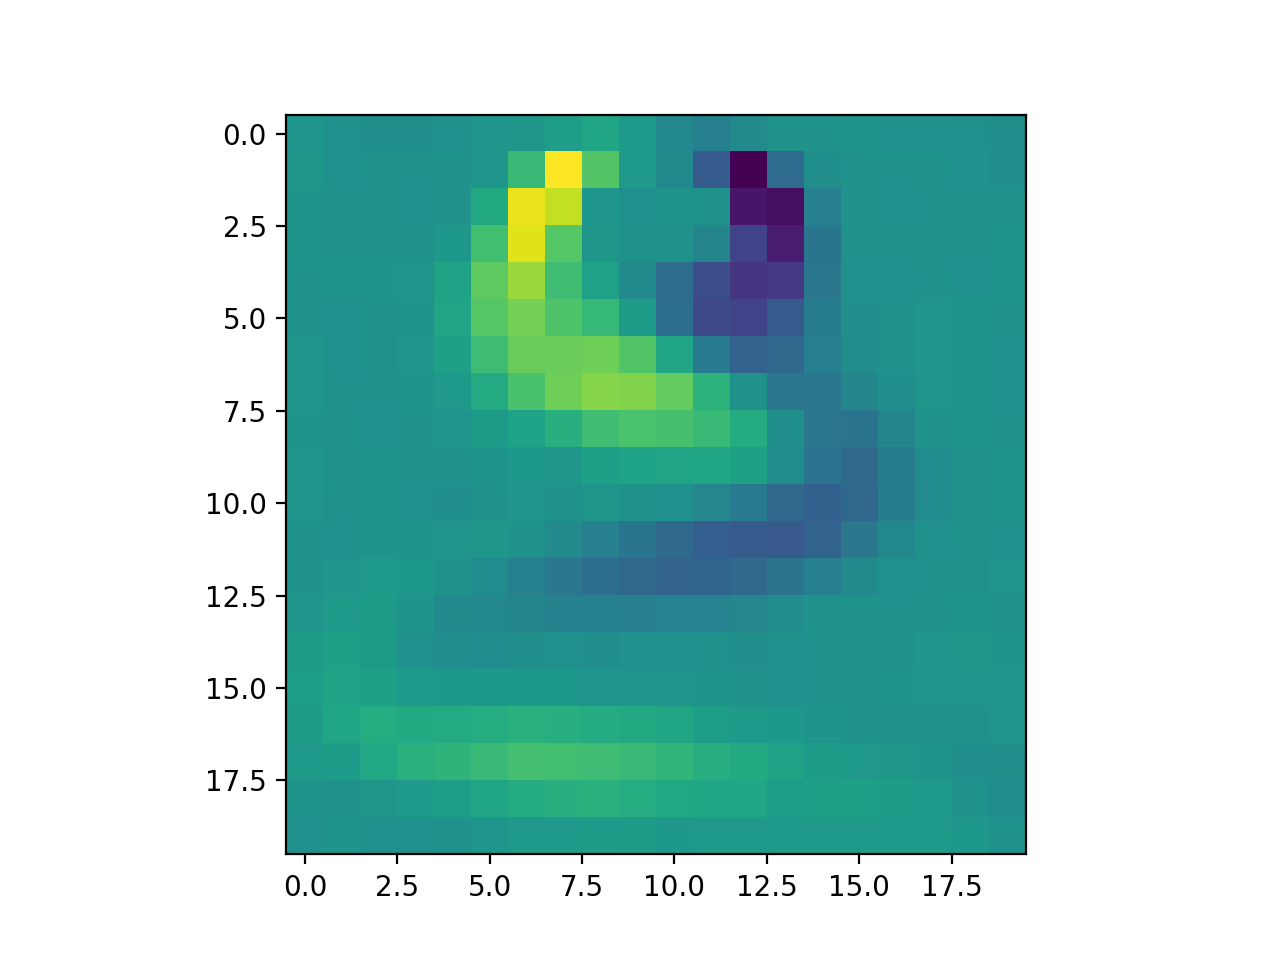

In [254]:
plt.figure()
plt.imshow(downsampled.reshape(20,20))

In [255]:
from scipy.optimize import minimize
eps = 0.001

# L1 Minimum norm solution s_L1
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type': 'ineq', 'fun': lambda x:  eps - np.linalg.norm(Theta @ x - downsampled,2)})
x0 = np.linalg.pinv(Theta) @ downsampled
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s1 = res.x

<IPython.core.display.Javascript object>


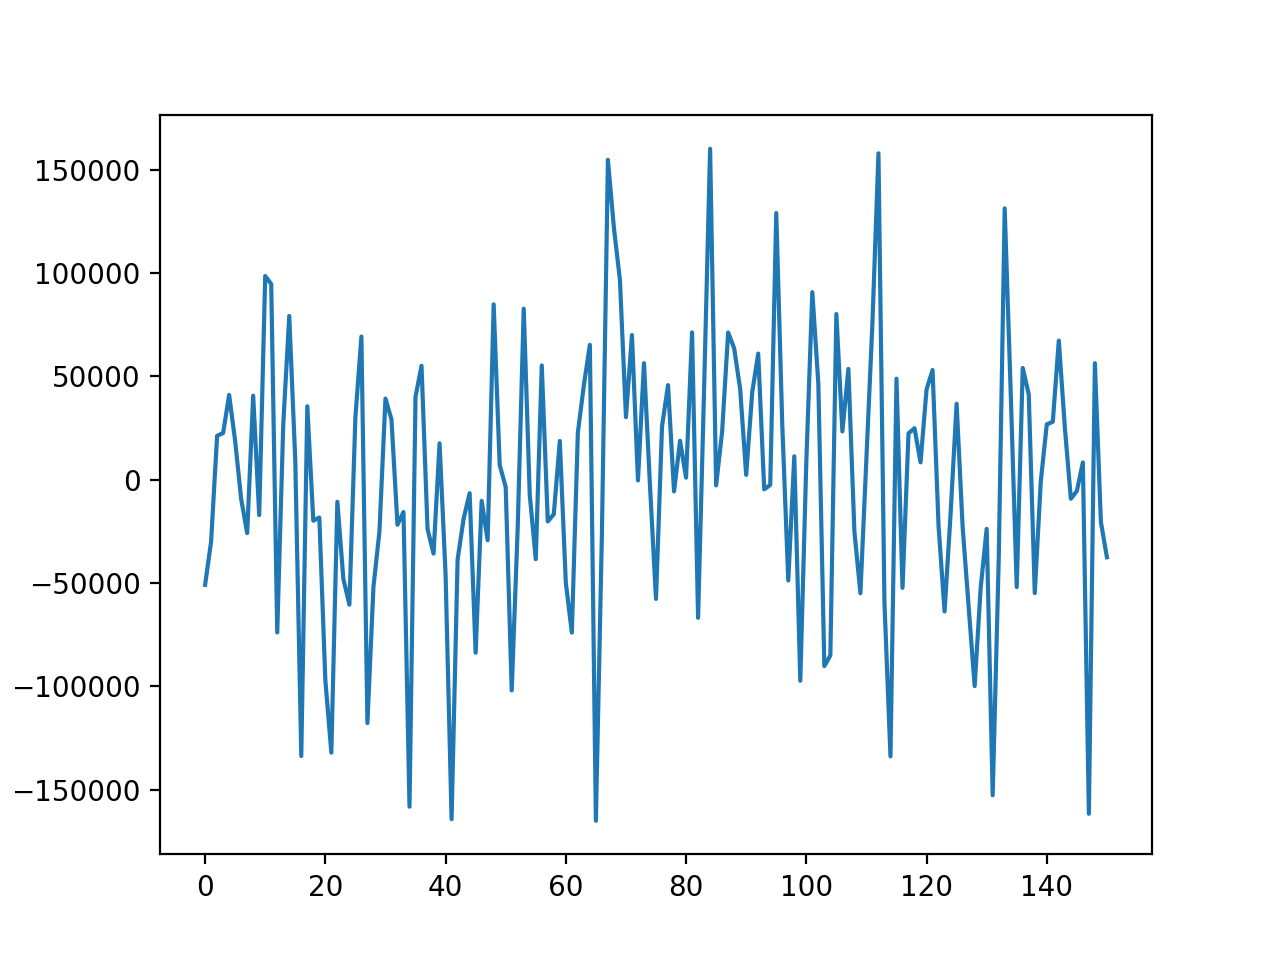

<IPython.core.display.Javascript object>


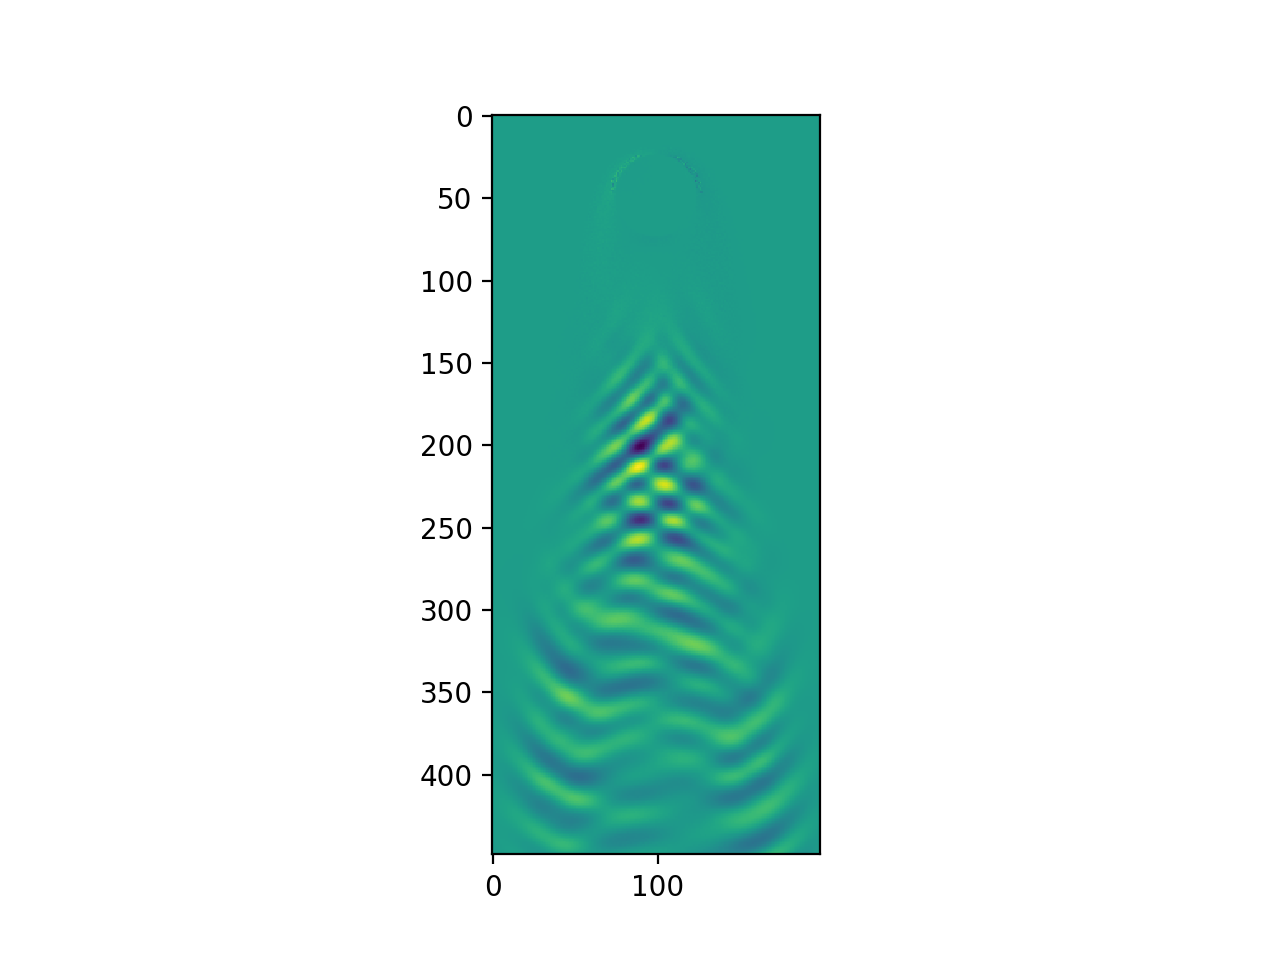

In [243]:
plt.figure()
plt.plot(x0)
plt.show()

plt.figure()
plt.imshow(np.reshape(snapshots @ (s1/normTheta),(n,m)))